In [1]:
import numpy as np
import pandas as pd
from fbprophet  import Prophet 

In [14]:
df = pd.read_excel(r"G:\traindata\yddata\forFBprophet.xlsx")
# df = pd.read_excel(r"G:\traindata\yddata\FB_6-7month.xlsx")
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2020-06-01,7.391415
1,2020-06-02,7.179460
2,2020-06-03,7.380318
3,2020-06-04,7.028113
4,2020-06-05,7.221690


In [15]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
future = m.make_future_dataframe(periods=0)
future.tail()

,ds
61,2020-08-01
62,2020-08-02
63,2020-08-03
64,2020-08-04
65,2020-08-05


In [17]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-06-01,7.162184,6.873252,7.524746,7.162184,7.162184,0.028620,0.028620,0.028620,0.028620,0.028620,0.028620,0.0,0.0,0.0,7.190804
1,2020-06-02,7.160346,6.871951,7.561374,7.160346,7.160346,0.056133,0.056133,0.056133,0.056133,0.056133,0.056133,0.0,0.0,0.0,7.216479
2,2020-06-03,7.158509,6.843168,7.547310,7.158509,7.158509,0.031916,0.031916,0.031916,0.031916,0.031916,0.031916,0.0,0.0,0.0,7.190424
3,2020-06-04,7.156671,6.781547,7.525197,7.156671,7.156671,-0.005116,-0.005116,-0.005116,-0.005116,-0.005116,-0.005116,0.0,0.0,0.0,7.151555
4,2020-06-05,7.154833,6.842472,7.548869,7.154833,7.154833,0.031859,0.031859,0.031859,0.031859,0.031859,0.031859,0.0,0.0,0.0,7.186692


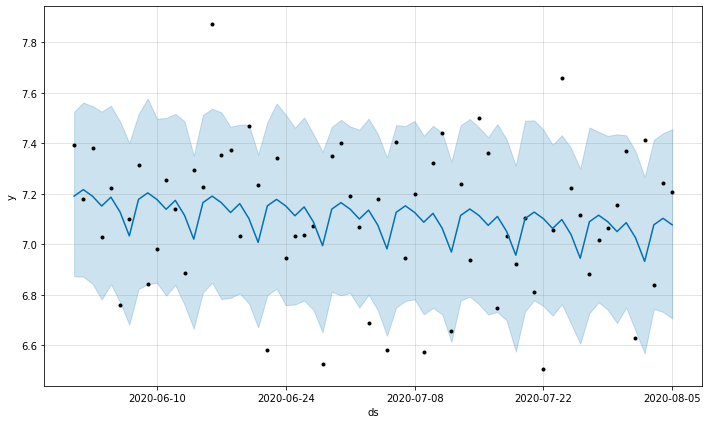

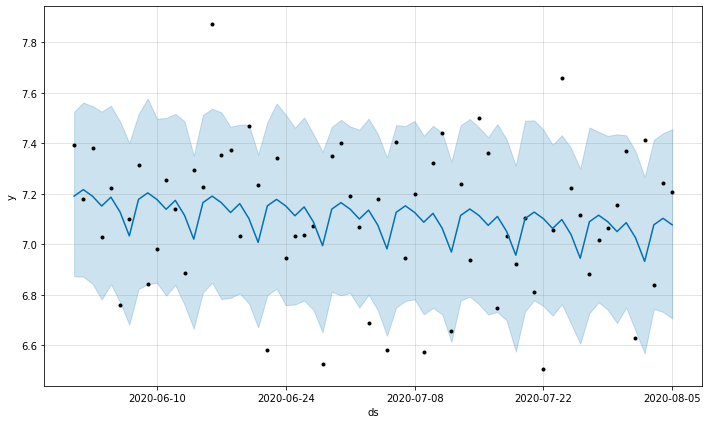

In [18]:
m.plot(forecast)

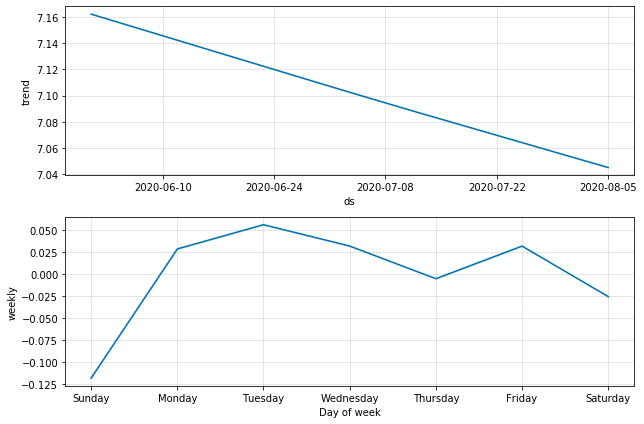

In [19]:
m.plot_components(forecast);

In [20]:
from sklearn.metrics import mean_absolute_error
import math

In [21]:
y = np.exp(df['y'] )

In [22]:
yhat = np.exp(forecast['yhat'])

In [23]:
mean_absolute_error(y,yhat)

273.6010091719009

In [24]:
import numpy as np
def MAPE(true, pred):
    diff = np.abs(np.array(true) - np.array(pred))
    return np.mean(diff / true)
    pint(np.mean(diff / true))
MAPE(y,yhat)

0.230274164257085

<function matplotlib.pyplot.show(*args, **kw)>

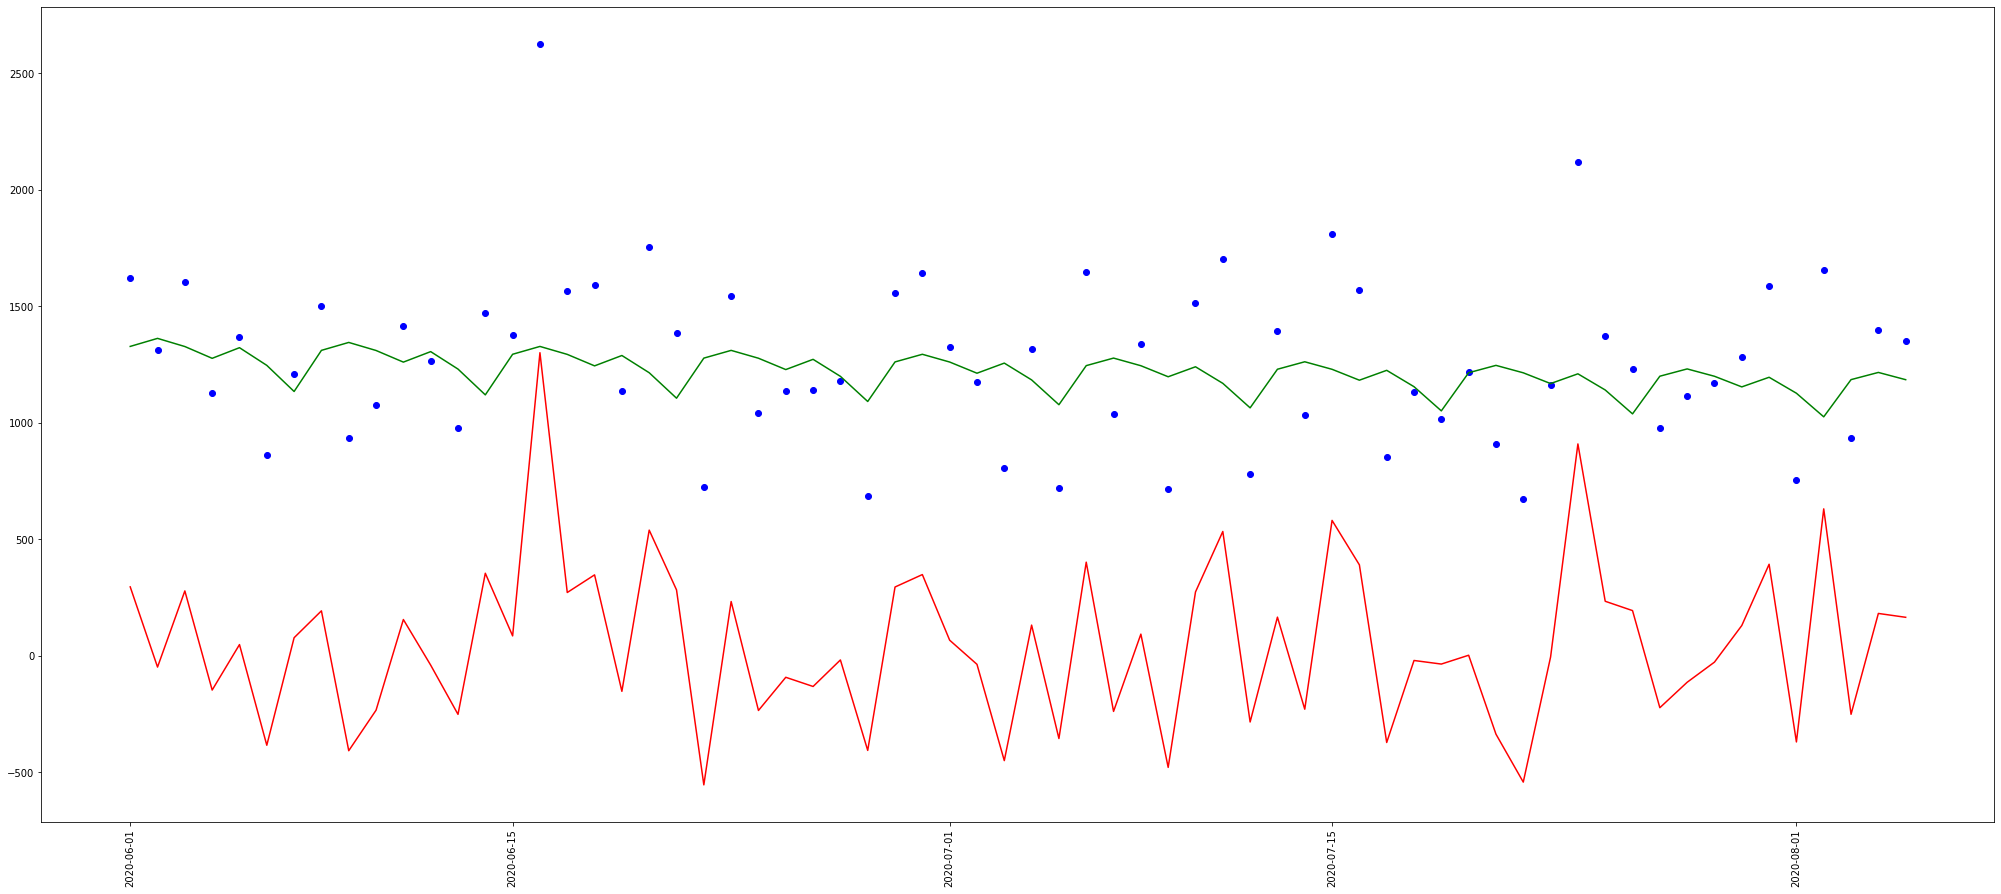

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(35, 15))#展示
ax = fig.add_subplot(111)
ax.plot(df.iloc[:,0],y-yhat,'r-')
ax.plot(df.iloc[:,0],y,'bo')
ax.plot(df.iloc[:,0],yhat,'g-')
plt.xticks(rotation=90)
plt.show